In [3]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Reading data from file as datarame
train=pd.read_csv(r'C:\Users\Rahul Narakula\Desktop\FDNY\train.csv')
test=pd.read_csv(r'C:\Users\Rahul Narakula\Desktop\FDNY\test.csv')

In [5]:
# View of first 6 samples from training data
train.head(6)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,...,5.0,0,0,0,0,0,0,0,0,5017319.0


In [6]:
print("****** Train *******")
train.info()
print("**************** Test *****************")
test.info()

**************** Train *****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137

In [7]:
print("**************** Identifying categorical and numerical variables *****************")
train.columns

**************** Identifying categorical and numerical variables *****************


Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [8]:
#Checking for duplicated values
print("**************** Check for Train Duplicates *****************")
train.duplicated().sum()
print("**************** Check for Test Duplicates  *****************")
test.duplicated().sum()

**************** Check for Train Duplicates *****************
**************** Check for Test Duplicates  *****************


0

In [9]:
# checking missing data
train.isnull().sum().sum()

0

In [10]:
## View Integer type columns
train.describe(include=[np.number])

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [11]:
## Categorical Columns
train.describe(include=['O'])

,Open Date,City,City Group,Type
count,137,137,137,137
unique,134,34,2,3
top,02/23/2010,İstanbul,Big Cities,FC
freq,2,50,78,76


In [12]:
# Method to plot correlation between Revenue and a categorical feature
def featureCatPlot(col):
    plt.figure(figsize=(10,4))
    i=1
    if not train[col].dtype.name=='int64' and not train[col].dtype.name=='float64':
        plt.subplot(1,2,i)
        sns.boxplot(x=col,y='revenue',data=train)
        plt.xticks(rotation=60)
        plt.ylabel('Revenue')
        i+=1 
        plt.subplot(1,2,i)
        mean=train.groupby(col)['revenue'].mean()
        level=mean.sort_values().index.tolist()
        train[col]=train[col].astype('category')
        train[col].cat.reorder_categories(level,inplace=True)
        train[col].value_counts().plot()
        plt.xticks(rotation=60)
        plt.xlabel(col)
        plt.ylabel('Counts')       
        plt.show()

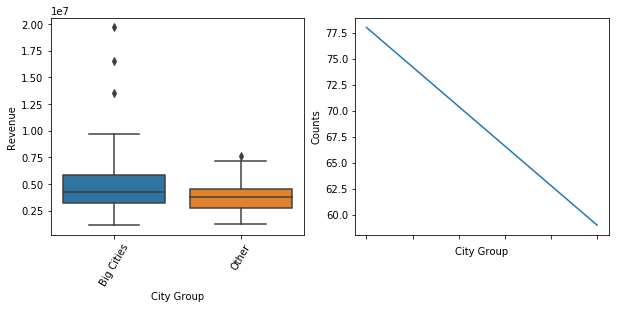

In [13]:
featureCatPlot('City Group')

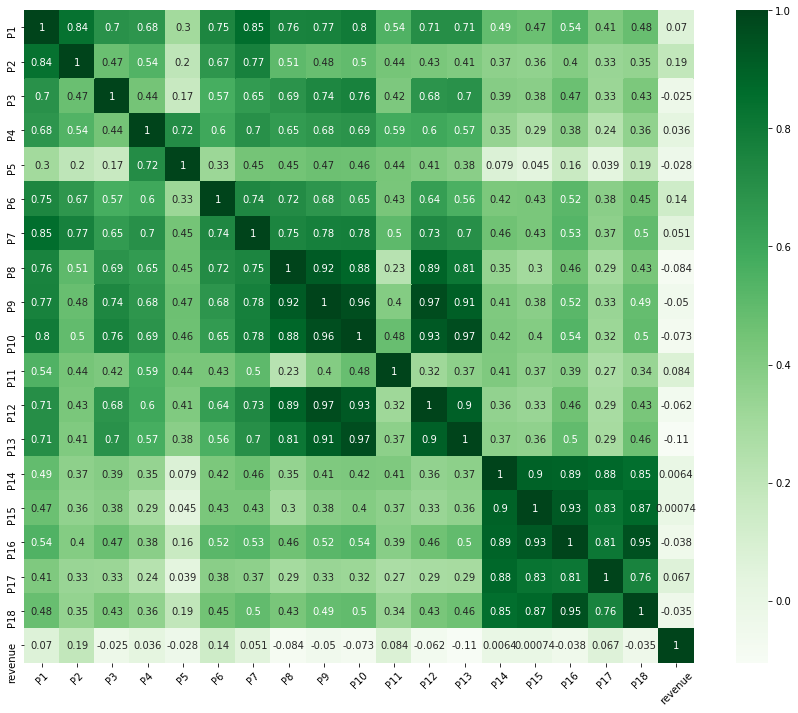

In [14]:
# Plotting heatmap between revenue and P variables
fig=plt.figure(figsize=(15,12))
features=(train.loc[:,'P1':'P18']).columns.tolist()
sns.heatmap(train[features+['revenue']].corr(),cmap='Greens',annot=True)
plt.xticks(rotation=45)
plt.show()